If needed, there are comments in the first part of the file `DataAnalysis_DMPC` that explains the logic used.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
Mix_density = np.array([0.993861,0.993770,0.993682,0.993591,0.993503,0.993411,0.993320,0.993227,0.993135,0.993042,0.992947,0.992856,0.992761,0.992667,0.992571,0.992474,0.992378,0.992281,0.992183,0.992084,0.991984,0.991877,0.991709,0.991581,0.991481,0.991382,0.991279,0.991179,0.991078,0.990976,0.990873,0.990770,0.990667,0.990564,0.990459,0.990356,0.990251,0.990145,0.990039,0.989933,0.989827])
Temperature = np.array([35.996,36.254,36.504,36.754,37.004,37.254,37.504,37.754,38.004,38.254,38.504,38.754,39.004,39.254,39.504,39.755,40.004,40.254,40.503,40.754,41.004,41.254,41.504,41.754,42.004,42.254,42.504,42.754,43.004,43.254,43.504,43.754,44.004,44.254,44.503,44.754,45.004,45.254,45.504,45.754,46.003])

a = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density = 0
for i in range(0, 5):
    water_density += a[i]*Temperature**i/(1+b*Temperature)
    
wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water = 1/water_density

Spec_vol = (Spec_vol_sample - (1 - wL) * Spec_vol_water)/wL

NameError: name 'np' is not defined

In [4]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha = np.empty(len(Temperature))

for i in range(0,len(alpha)-1):
    alpha[i] = ((Spec_vol[i+1]-Spec_vol[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol[i]

In [ ]:
'''
for i in range(0, len(Temperature)):
    if Temperature[i] == 39.755:
        b = i
    elif Temperature[i] == 43.254:
        t = i
for j in range(b, t):
    print("Iteration " + str(j) + ": " + str(Spec_vol[j+1]-Spec_vol[j]))
'''

In [5]:
onset = 20
offset = 23

# Down
Temperature_down = Temperature[:onset]

c1 = np.polyfit(Temperature_down, Spec_vol[:onset], 1)
Spec_down = Temperature_down * c1[0] + c1[1]

#Mid
Temperature_mid = Temperature[onset:offset]

c2 = np.polyfit(Temperature_mid, Spec_vol[onset:offset], 1)
Spec_mid = Temperature_mid * c2[0] + c2[1]

#Up
Temperature_up = Temperature[offset:]

c3 = np.polyfit(Temperature_up, Spec_vol[offset:], 1)
Spec_up = Temperature_up * c3[0] + c3[1]

In [6]:
a1 = c1[0]
a2 = c2[0]
a3 = c3[0]

b1 = c1[1]
b2 = c2[1]
b3 = c3[1]

T_onset = (b2 - b1)/(a1 - a2)
T_offset = (b3 - b2)/(a2 - a3)
T_m = np.mean([T_offset,T_onset])

v_onset = a1/(a1-a2)*(b2-b1)+b1
v_offset = a2/(a2-a3)*(b3-b2)+b2
v_mean = np.mean([v_onset,v_offset])

In [7]:
T_m

41.39048545117069

In [8]:
M = 734
Na = 6.02214076*10**(23)

vm = Spec_vol*M/Na*10**(24)
vm_gel = np.mean(Spec_vol[:onset]*M/Na*10**(24))
vm_fluid = np.mean(Spec_vol[offset:]*M/Na*10**(24))
vm_gel

1190.8078098035255

In [12]:
vm_gel,vm_fluid

(1190.8078098035255, 1268.6779581574476)

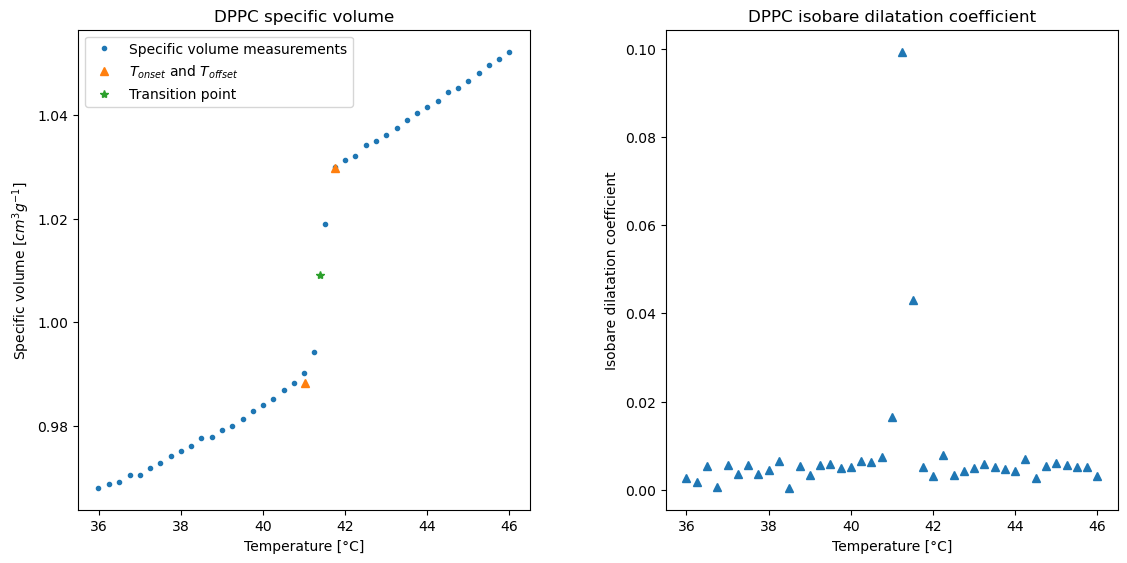

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

ax[0].plot(Temperature, Spec_vol,'.',label='Specific volume measurements')
#ax[0].plot(Temperature_down, Spec_down,'--',label='Linear regression of pre-transition points')
#ax[0].plot(Temperature_mid, Spec_mid,'--',label='Linear regression of transition points')
#ax[0].plot(Temperature_up, Spec_up,'--',label='Linear regression of post-transition points')
ax[0].plot([T_onset,T_offset],[v_onset,v_offset],'^',label='$T_{onset}$ and $T_{offset}$')
ax[0].plot(T_m,v_mean,'*',label='Transition point')
ax[0].legend()

ax[1].plot(Temperature,alpha,'^')

ax[0].set_xlabel('Temperature [°C]')
ax[1].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Specific volume [$cm^3g^{-1}$]')
ax[1].set_ylabel('Isobare dilatation coefficient')
ax[0].set_title('DPPC specific volume')
ax[1].set_title('DPPC isobare dilatation coefficient')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)